# Climate Change: Earth Surface Temperature Data
Exploring global temperatures since 1750

# What data are we working with?

Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science. We are turning some of the data over to you so you can form your own view.

Even more than with other data sets that Kaggle has featured, there’s a huge amount of data cleaning and preparation that goes into putting together a long-time study of climate trends. Early data was collected by technicians using mercury thermometers, where any variation in the visit time impacted measurements. In the 1940s, the construction of airports caused many weather stations to be moved. In the 1980s, there was a move to electronic thermometers that are said to have a cooling bias.

Given this complexity, there are a range of organizations that collate climate trends data. The three most cited land and ocean temperature data sets are NOAA’s MLOST, NASA’s GISTEMP and the UK’s HadCrut.

We have repackaged the data from a newer compilation put together by the Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away.

In this dataset, we have include several files:

Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

- Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures
- LandAverageTemperature: global average land temperature in celsius
- LandAverageTemperatureUncertainty: the 95% confidence interval around the average
- LandMaxTemperature: global average maximum land temperature in celsius
- LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature
- LandMinTemperature: global average minimum land temperature in celsius
- LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature
- LandAndOceanAverageTemperature: global average land and ocean temperature in celsius
- LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global average land and ocean temperature

Other files include:

- Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)
- Global Average Land Temperature by State (GlobalLandTemperaturesByState.csv)
- Global Land Temperatures By Major City (GlobalLandTemperaturesByMajorCity.csv)
- Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv)

The raw data comes from the Berkeley Earth data page.

# Project Planning

1. Acquisition
2. Preparation
3. Exploration
4. Modeling
5. Delivery

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Acquire

In [4]:
df = pd.read_csv('climate-change-data/GlobalLandTemperaturesByMajorCity.csv')

In [5]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [9]:
df.shape

(239177, 7)

In [10]:
df.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

# Prepare

In [13]:
df['dt'] = pd.to_datetime(df.dt)

In [14]:
df.dt

0        1849-01-01
1        1849-02-01
2        1849-03-01
3        1849-04-01
4        1849-05-01
            ...    
239172   2013-05-01
239173   2013-06-01
239174   2013-07-01
239175   2013-08-01
239176   2013-09-01
Name: dt, Length: 239177, dtype: datetime64[ns]

In [16]:
df = df.sort_values('dt')

In [17]:
df = df.set_index('dt')

In [18]:
df.City.value_counts()

Toronto       3239
Paris         3239
Chicago       3239
Kiev          3239
Istanbul      3239
              ... 
Luanda        1893
Durban        1881
Cape Town     1881
Umm Durman    1857
Lima          1591
Name: City, Length: 100, dtype: int64

In [20]:
df = df.loc[df['City'] == 'Chicago']

In [21]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-11-01,5.436,2.205,Chicago,United States,42.59N,87.27W
1743-12-01,NaN,NaN,Chicago,United States,42.59N,87.27W
1744-01-01,NaN,NaN,Chicago,United States,42.59N,87.27W
1744-02-01,NaN,NaN,Chicago,United States,42.59N,87.27W
1744-03-01,NaN,NaN,Chicago,United States,42.59N,87.27W


<AxesSubplot:xlabel='dt'>

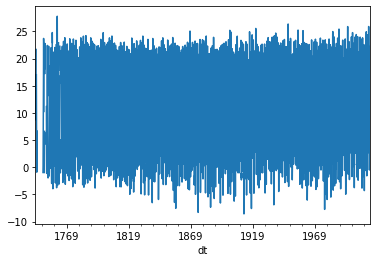

In [22]:
df.AverageTemperature.plot()

In [23]:
df = df.dropna()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3141 entries, 1743-11-01 to 2013-09-01
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             3141 non-null   float64
 1   AverageTemperatureUncertainty  3141 non-null   float64
 2   City                           3141 non-null   object 
 3   Country                        3141 non-null   object 
 4   Latitude                       3141 non-null   object 
 5   Longitude                      3141 non-null   object 
dtypes: float64(2), object(4)
memory usage: 171.8+ KB


We went from **3239 observations** to **3141 observations** after dropping null values. `AverageTemperature` had some null values.

In [25]:
df['year'] = df.index.year
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
dt,,,,,,,
1743-11-01,5.436,2.205,Chicago,United States,42.59N,87.27W,1743
1744-04-01,8.766,2.357,Chicago,United States,42.59N,87.27W,1744
1744-05-01,11.605,2.102,Chicago,United States,42.59N,87.27W,1744
1744-06-01,17.965,1.989,Chicago,United States,42.59N,87.27W,1744
1744-07-01,21.680,1.786,Chicago,United States,42.59N,87.27W,1744


In [26]:
df['month'] = df.index.month
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
dt,,,,,,,,
1743-11-01,5.436,2.205,Chicago,United States,42.59N,87.27W,1743,11
1744-04-01,8.766,2.357,Chicago,United States,42.59N,87.27W,1744,4
1744-05-01,11.605,2.102,Chicago,United States,42.59N,87.27W,1744,5
1744-06-01,17.965,1.989,Chicago,United States,42.59N,87.27W,1744,6
1744-07-01,21.680,1.786,Chicago,United States,42.59N,87.27W,1744,7


<AxesSubplot:xlabel='year'>

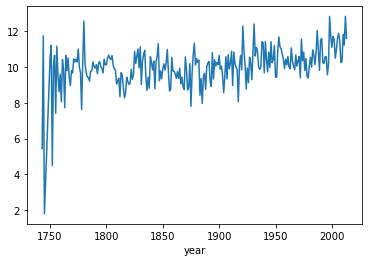

In [29]:
df.groupby('year').AverageTemperature.mean().plot()

In [30]:
# set train size to be 50% of total 
train_size = int(len(df) * 0.5)
train_size

1570

In [31]:
# set validate size to be 30% of total 
validate_size = int(len(df) * 0.3)
validate_size

942

In [32]:
# set test size to be number of rows remaining. 
test_size = int(len(df) - train_size - validate_size)
test_size

629

In [33]:
# validate will go from 1570 to 1570+942
validate_end_index = train_size + validate_size
validate_end_index

2512

Use those values to split our dataframe

In [34]:
# train will go from 0 to 911
train = df[:train_size]
# validate will go from 912 to 1458
validate = df[train_size:validate_end_index]
# test will include 1459 to the end
test = df[validate_end_index:]

**Verify Splits**

Does the length of each df equate to the length of the original df?

In [35]:
# is len of train + validate + test == lenght of entire dataframe. 
print(len(train) + len(validate) + len(test) == len(df))

True


Does the first row of original df equate to the first row of train?

In [36]:
print(df.head(1) == train.head(1))

            AverageTemperature  AverageTemperatureUncertainty  City  Country  \
dt                                                                             
1743-11-01                True                           True  True     True   

            Latitude  Longitude  year  month  
dt                                            
1743-11-01      True       True  True   True  


Is the last row of train the day before the first row of validate? And the same for validate to test?

In [37]:
pd.concat([train.tail(1), validate.head(1)])

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
dt,,,,,,,,
1882-10-01,14.699,0.560,Chicago,United States,42.59N,87.27W,1882,10
1882-11-01,7.209,0.751,Chicago,United States,42.59N,87.27W,1882,11


In [38]:
pd.concat([validate.tail(1), test.head(1)])

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
dt,,,,,,,,
1961-04-01,5.141,0.322,Chicago,United States,42.59N,87.27W,1961,4
1961-05-01,10.005,0.138,Chicago,United States,42.59N,87.27W,1961,5


Is the last row of test the same as the last row of our original dataframe?

In [39]:
pd.concat([test.tail(1), df.tail(1)])

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
dt,,,,,,,,
2013-09-01,19.977,1.033,Chicago,United States,42.59N,87.27W,2013,9
2013-09-01,19.977,1.033,Chicago,United States,42.59N,87.27W,2013,9


# Explore

Let's plot our data first, viewing where the data is split into train and test.

In [43]:
train.columns.to_list()[0:2]

['AverageTemperature', 'AverageTemperatureUncertainty']

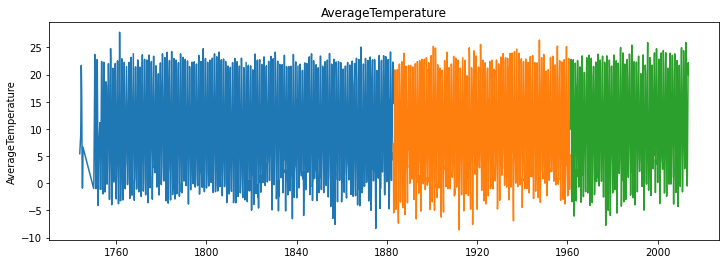

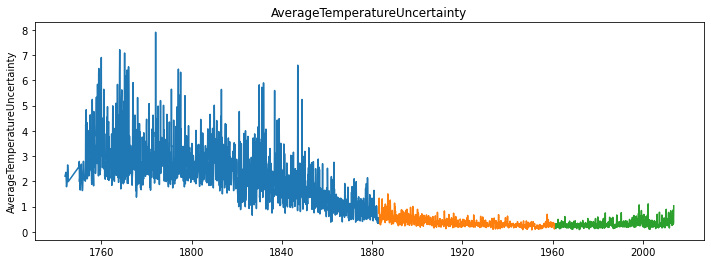

In [44]:
for col in train.columns.to_list()[0:2]:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

**Takeaways**:
- `AverageTemperatureUncertainty` is much higher in our train split than validate and test
- Perhaps temparture started to become more certain after 1880 because of improved technology
- Seems like `AverageTemperature` is fairly consistent across time

In [50]:
df_cols= df[['AverageTemperature', 'AverageTemperatureUncertainty']]

In [51]:
df_cols.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1743-11-01,5.436,2.205
1744-04-01,8.766,2.357
1744-05-01,11.605,2.102
1744-06-01,17.965,1.989
1744-07-01,21.680,1.786


In [52]:
df_cols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3141 entries, 1743-11-01 to 2013-09-01
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             3141 non-null   float64
 1   AverageTemperatureUncertainty  3141 non-null   float64
dtypes: float64(2)
memory usage: 73.6 KB


In [54]:
import statsmodels.api as sm

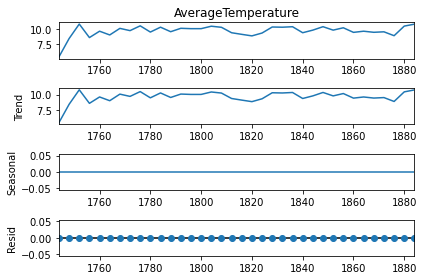

In [72]:
sm.tsa.seasonal_decompose(train.AverageTemperature.resample('4Y').mean()).plot()
None

# Modeling

Before we try out different methods for forecasting sales and number of items sold, let's create a couple of functions that will be helpful in evaluating each of the methods that follow.

evaluate() will compute the Mean Squared Error and the Rood Mean Squared Error to evaluate.

In [96]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [87]:
def evaluate(yhat_df, target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

plot_and_eval() will use the evaluate function and also plot train and test values with the predicted values in order to compare performance.

In [100]:
def plot_and_eval(yhat_df, target_var, rmse):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    # rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

Write append_eval_df(model_type) to append evaluation metrics for each model type, target variable, and metric type, along with the metric value into our eval_df data frame object. Which we will create an empty eval_df dataframe object to start.

In [101]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [112]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var, rmse):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    # rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

## Forecast

Forecasting is another word for predicting time series data.

1. Last Observed Value: The future will look like the now
2. Simple Average: The future will look, on average, like history.
3. Moving Average: The future will look, on average, like recent history.
4. Holt's Linear Trend
5. Previous Cycle


In [103]:
def make_predictions(temp):
    yhat_df = pd.DataFrame({'AverageTemperature': [temp]}, 
                       index = validate.index)
    return yhat_df

### Last Observed Value

The simplest method for forecasting is to predict all future values to be the last observed value.


**Make Predictions**

In [104]:
# take the last item of temperature and assign to variable
temp = round(train['AverageTemperature'][-1:][0], 2)
temp

14.7

In [105]:
yhat_df_lov = make_predictions(temp)
yhat_df_lov.head()

,AverageTemperature
dt,
1882-11-01,14.7
1882-12-01,14.7
1883-01-01,14.7
1883-02-01,14.7
1883-03-01,14.7


In [106]:
yhat_df_lov.describe()

,AverageTemperature
count,9.420000e+02
mean,1.470000e+01
std,2.221626e-13
min,1.470000e+01
25%,1.470000e+01
50%,1.470000e+01
75%,1.470000e+01
max,1.470000e+01


You can see, when peeking into yhat_df, that every predicted value is the same.



**Plot Actual vs. Predicted Values**

Now, let's plot actual and predicted values

In [107]:
rmse_lov = evaluate(yhat_df_lov, 'AverageTemperature')

AverageTemperature -- RMSE: 10


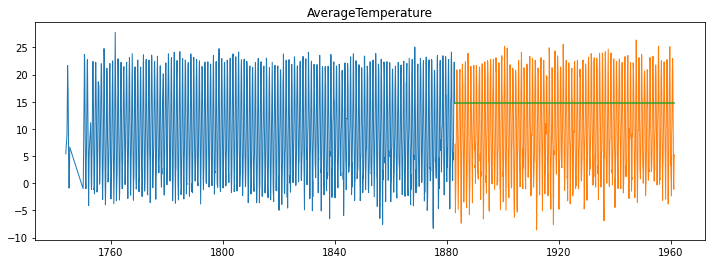

In [108]:
plot_and_eval(yhat_df_lov, 'AverageTemperature', rmse_lov)

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to eval_df


In [113]:
eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'AverageTemperature', rmse = rmse_lov)

eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,10.0


### Simple Average

Take the simple average of historical values and use that value to predict future values.   

This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assigned the same value, and that value will be the overall mean of the values in train. 

**Make Predictions**

Temperature: establishing the value of the prediction we will make

In [114]:
# compute simple average
temp = round(train['AverageTemperature'].mean(), 2)
temp

9.78

Apply predictions to our observations

In [116]:
yhat_df_sa = make_predictions(temp)
yhat_df_sa.head()

,AverageTemperature
dt,
1882-11-01,9.78
1882-12-01,9.78
1883-01-01,9.78
1883-02-01,9.78
1883-03-01,9.78


In [117]:
yhat_df_sa.describe()

,AverageTemperature
count,9.420000e+02
mean,9.780000e+00
std,1.777300e-15
min,9.780000e+00
25%,9.780000e+00
50%,9.780000e+00
75%,9.780000e+00
max,9.780000e+00


**Plot Actual vs. Predicted Values**

Now, let's plot and evaluate the performance of our time series model using **Simple Average**

In [118]:
rmse_sa = evaluate(yhat_df_sa, 'AverageTemperature')

AverageTemperature -- RMSE: 8


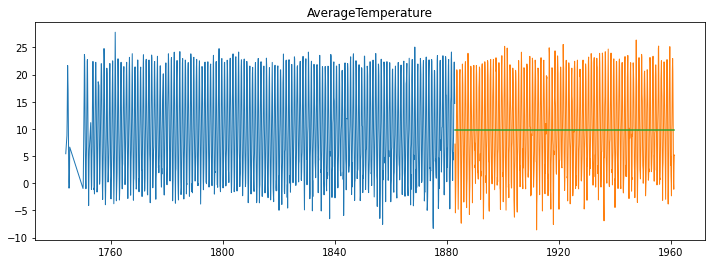

In [119]:
plot_and_eval(yhat_df_sa, 'AverageTemperature', rmse_sa)

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [120]:
eval_df = append_eval_df(model_type='simple_average', 
                            target_var = 'AverageTemperature', rmse=rmse_sa)
eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,10.0
1,simple_average,AverageTemperature,8.0


### Moving Average

In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value. 

In [121]:
# demonstrate that the mean of the first 30 days 
# is equal to rolling(30) on day 30

print(train['AverageTemperature'].rolling(30).mean())


dt
1743-11-01          NaN
1744-04-01          NaN
1744-05-01          NaN
1744-06-01          NaN
1744-07-01          NaN
                ...    
1882-06-01     9.673200
1882-07-01    10.123967
1882-08-01    10.771600
1882-09-01    11.298667
1882-10-01    11.544733
Name: AverageTemperature, Length: 1570, dtype: float64


**Make Predictions**

In [123]:
period = 12

# take 12 month rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
temp = round(train['AverageTemperature'].rolling(period).mean()[-1], 2)
print(temp)

10.74


In [125]:
yhat_df_ma = make_predictions(temp)
yhat_df_ma.head()

,AverageTemperature
dt,
1882-11-01,10.74
1882-12-01,10.74
1883-01-01,10.74
1883-02-01,10.74
1883-03-01,10.74


**Plot Actual vs. Predicted Values**

Now, let's plot and evaluate the performance of our time series model using **Moving Average**

In [126]:
rmse_ma = evaluate(yhat_df_ma, 'AverageTemperature')

AverageTemperature -- RMSE: 8


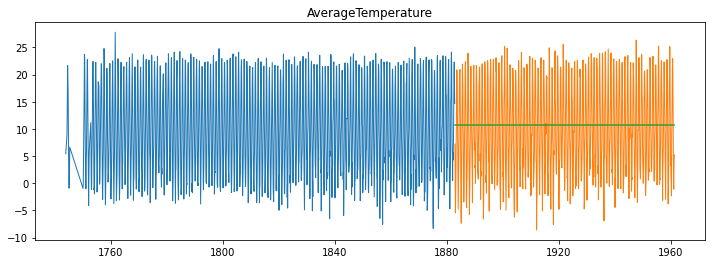

In [127]:
plot_and_eval(yhat_df_ma, 'AverageTemperature', rmse_ma)

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [128]:
eval_df = append_eval_df(model_type = '12m_moving_avg', 
                            target_var = 'AverageTemperature', rmse=rmse_ma)

eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,10.0
1,simple_average,AverageTemperature,8.0
2,12m_moving_avg,AverageTemperature,8.0


### Predict Based on Previous Cycle

Take all the 2016 data points, compute the daily delta, year-over-year, average that delta over all the days, and adding that average to the previous year's value on a day will give you the forecast for that day. 

If a primary cycle is weekly, then you may want to do this on a week-over-week cadence. 

In the below example:  
1. Compute the 365 average year over year differences from 2013 through 2015
2. Add that average delta to the values during 2015. 
3. Set the index in your yhat dataframe to represent the dates those predictions are make for. 

Let's get started....

**Re-split data**

In [136]:
df

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
dt,,,,,,,,
1743-11-01,5.436,2.205,Chicago,United States,42.59N,87.27W,1743,11
1744-04-01,8.766,2.357,Chicago,United States,42.59N,87.27W,1744,4
1744-05-01,11.605,2.102,Chicago,United States,42.59N,87.27W,1744,5
1744-06-01,17.965,1.989,Chicago,United States,42.59N,87.27W,1744,6
1744-07-01,21.680,1.786,Chicago,United States,42.59N,87.27W,1744,7
...,...,...,...,...,...,...,...,...
2013-05-01,13.734,0.863,Chicago,United States,42.59N,87.27W,2013,5
2013-06-01,17.913,0.669,Chicago,United States,42.59N,87.27W,2013,6
2013-07-01,21.914,0.322,Chicago,United States,42.59N,87.27W,2013,7


In [130]:
train = df[:'2010']
validate = df['2011']
test = df['2012']

print(train.shape)
print(validate.shape)
print(test.shape)

train.head()
train.tail()

(3108, 8)
(12, 8)
(12, 8)


,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
dt,,,,,,,,
2010-08-01,24.948,0.360,Chicago,United States,42.59N,87.27W,2010,8
2010-09-01,19.229,0.322,Chicago,United States,42.59N,87.27W,2010,9
2010-10-01,14.582,0.241,Chicago,United States,42.59N,87.27W,2010,10
2010-11-01,8.539,0.307,Chicago,United States,42.59N,87.27W,2010,11
2010-12-01,-0.071,0.326,Chicago,United States,42.59N,87.27W,2010,12


In [137]:
train['2010']

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
dt,,,,,,,,
2010-01-01,-0.595,0.348,Chicago,United States,42.59N,87.27W,2010,1
2010-02-01,0.771,0.364,Chicago,United States,42.59N,87.27W,2010,2
2010-03-01,6.489,0.357,Chicago,United States,42.59N,87.27W,2010,3
2010-04-01,10.935,0.538,Chicago,United States,42.59N,87.27W,2010,4
2010-05-01,13.803,0.892,Chicago,United States,42.59N,87.27W,2010,5
2010-06-01,19.055,0.330,Chicago,United States,42.59N,87.27W,2010,6
2010-07-01,24.106,0.325,Chicago,United States,42.59N,87.27W,2010,7
2010-08-01,24.948,0.360,Chicago,United States,42.59N,87.27W,2010,8
2010-09-01,19.229,0.322,Chicago,United States,42.59N,87.27W,2010,9


**Make Predictions**

In [145]:
# finding the year-over-year difference for each day from 2013 to 2015
# taking the mean, and then adding that value to the daily 2015 values. 

# find yoy diff. from 2013-2014 and 2014-2015, take the mean, and add to each value in 2015. 
yhat_df_pc = train['2010'].AverageTemperature + train.AverageTemperature.diff(12).mean()

Back to predictions

In [142]:
train.loc['2010'].head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
dt,,,,,,,,
2010-01-01,-0.595,0.348,Chicago,United States,42.59N,87.27W,2010,1
2010-02-01,0.771,0.364,Chicago,United States,42.59N,87.27W,2010,2
2010-03-01,6.489,0.357,Chicago,United States,42.59N,87.27W,2010,3
2010-04-01,10.935,0.538,Chicago,United States,42.59N,87.27W,2010,4
2010-05-01,13.803,0.892,Chicago,United States,42.59N,87.27W,2010,5


In [144]:
yhat_df_pc.head()

dt
2010-01-01    -0.581448
2010-02-01     0.784552
2010-03-01     6.502552
2010-04-01    10.948552
2010-05-01    13.816552
Name: AverageTemperature, dtype: float64

In [147]:
# let's peek into the prediction we will make for 1/1/2016
# by comparing the predicted value 
# (2015 value + year-over-year average difference)
# to the actual 1/1/2016 value
pd.concat([yhat_df_pc.head(1), validate.AverageTemperature.head(1)])

dt
2010-01-01   -0.581448
2011-01-01   -1.582000
Name: AverageTemperature, dtype: float64

In [148]:
# set yhat_df to index of validate
yhat_df_pc.index = validate.index

In [149]:
yhat_df_pc.describe()

count    12.000000
mean     11.829469
std       9.043660
min      -0.581448
25%       5.073052
50%      12.382552
75%      19.112052
max      24.961552
Name: AverageTemperature, dtype: float64

In [150]:
yhat_df_pc.head()

dt
2011-01-01    -0.581448
2011-02-01     0.784552
2011-03-01     6.502552
2011-04-01    10.948552
2011-05-01    13.816552
Name: AverageTemperature, dtype: float64

In [151]:
yhat_df_pc.shape

(12,)

**Plot Actual vs. Predicted Values**

Now, let's plot and evaluate the performance of our time series model using **Moving Average**

In [154]:
rmse_pc = round(sqrt(mean_squared_error(validate['AverageTemperature'], yhat_df_pc)), 0)

AverageTemperature -- RMSE: 2


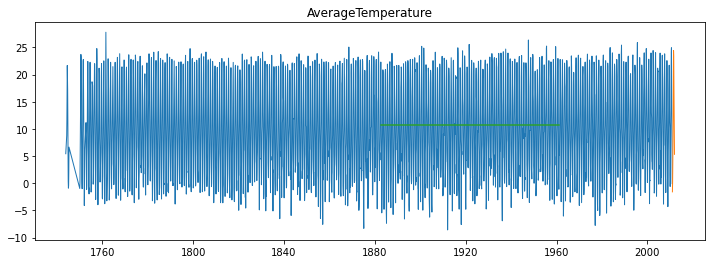

In [155]:
plot_and_eval(yhat_df_ma, 'AverageTemperature', rmse_pc)

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [156]:
eval_df = append_eval_df(model_type = 'previous_cycle', 
                            target_var = 'AverageTemperature', rmse=rmse_pc)

eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,10.0
1,simple_average,AverageTemperature,8.0
2,12m_moving_avg,AverageTemperature,8.0
3,previous_cycle,AverageTemperature,2.0


## Conclusion

Which model did the best? 

In [158]:
temp_min_rmse = eval_df.groupby('target_var')['rmse'].min()[0]

# find which model that is
eval_df[(eval_df.rmse == temp_min_rmse)]

,model_type,target_var,rmse
3,previous_cycle,AverageTemperature,2.0


Let's test it out on our out-of-sample data

We will be using train + validate to predict test. 

In [160]:
yhat_df = validate.AverageTemperature + train.AverageTemperature.diff(12).mean()
yhat_df.index = test.index

In [161]:
yhat_df

dt
2012-01-01    -1.568448
2012-02-01     0.289552
2012-03-01     3.487552
2012-04-01     7.396552
2012-05-01    12.146552
2012-06-01    18.024552
2012-07-01    24.425552
2012-08-01    23.427552
2012-09-01    18.344552
2012-10-01    13.850552
2012-11-01     9.568552
2012-12-01     5.340552
Name: AverageTemperature, dtype: float64

In [164]:
rmse_temp = sqrt(mean_squared_error(test['AverageTemperature'], 
                                       yhat_df))

In [165]:
print('rmse-temp: ', rmse_temp)

rmse-temp:  3.245404185065921


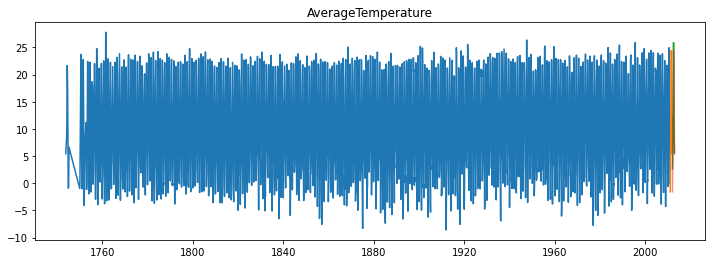

In [167]:
plt.figure(figsize=(12,4))
plt.plot(train['AverageTemperature'], label='train')
plt.plot(validate['AverageTemperature'], label='validate')
plt.plot(test['AverageTemperature'], label='test')
plt.plot(yhat_df, alpha=.5)
plt.title('AverageTemperature')
plt.show()

In [168]:
# to predict 2013

yhat_df = test.AverageTemperature + train.AverageTemperature.diff(12).mean()

yhat_df.index = test.index + pd.Timedelta('1Y')

In [169]:
yhat_df.head()

dt
2012-12-31 05:49:12     2.683552
2013-01-31 05:49:12     3.711552
2013-03-01 05:49:12    12.158552
2013-04-01 05:49:12     8.396552
2013-05-01 05:49:12    14.969552
Name: AverageTemperature, dtype: float64

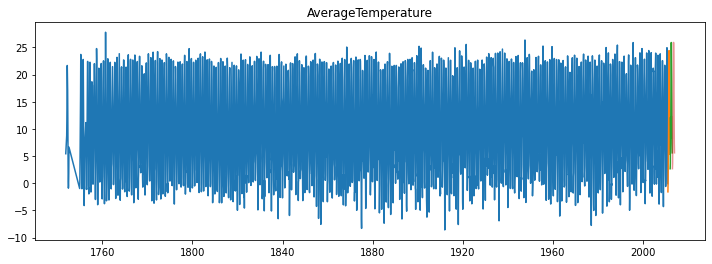

In [170]:
plt.figure(figsize=(12,4))
plt.plot(train['AverageTemperature'], label='train')
plt.plot(validate['AverageTemperature'], label='validate')
plt.plot(test['AverageTemperature'], label='test')
plt.plot(yhat_df, alpha=.5)
plt.title('AverageTemperature')
plt.show()